# Introduction

In this notebook, I will attempt to tweak the multi-level perceptron model provided in the sample notebook, and report my findings. The list of tweaks are listed as follow (keeping everything else default):<br>

1) Fully connected layer output shape: (512, 256)(default) vs (256, 128) and (1024, 512)<br>
2) Dropout rate: 0.2(default) vs 0.1 vs 0.5<br>
3) 2 hiddenlayer vs 3 hiddenlayers: (512, 256)(default) vs [1024, 512, 256].<br>
4) learning rate: 0.01(default) vs 0.03 and 0.01 with 0.00001 weight decay(time-based decay)<br>
5) Activation Function: 'relu' (default) vs 'sigmoid' and 'softplus'

After that, I will design a MLP model based on what I observed.

## Load Python libraries

Let's load some useful Python libraries:
1. numpy: structural data types
2. pandas: data loading and manipulation
3. matplotlib, sns: data visualization
4. sklearn: data analytics algorithms
5. Tensorflow: Deep Learning library
6. Keras: Wrapper for Tensorflow

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline  

import numpy as np

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers import Activation
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras import backend as K

from keras.datasets import cifar10


Using TensorFlow backend.


## Load data, perform reshape, normalization and one-hot encoding of labels

In [3]:
#number of final classes (in cifar10, there are 10 classes)
nb_classes = 10
nb_epoch = 100
batch_size = 128

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train.reshape(50000, 32 * 32 * 3)
X_test = X_test.reshape(10000, 32 * 32 * 3)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

## Define plot function:

In [4]:
def plot_train_acc(i, historyList):
    fig = plt.figure()
    for index, his in enumerate(historyList):
        plt.plot(range(nb_epoch),his.history['acc'],label='training'+str(index))
    plt.legend(loc=0)
    plt.xlabel('epochs')
    plt.ylabel('training_accuracy')
    plt.xlim([1,nb_epoch])
    plt.grid(True)
    plt.title("Training Accuracy Comparison")
    plt.show()
    fig.savefig('img/'+str(i)+'-training-accuracy.png')
    plt.close(fig)
    
def plot_val_acc(i, historyList):
    fig = plt.figure()
    for index, his in enumerate(historyList):
        plt.plot(range(nb_epoch),his.history['val_acc'],label='validation'+str(index))
    plt.legend(loc=0)
    plt.xlabel('epochs')
    plt.ylabel('validation_accuracy')
    plt.xlim([1,nb_epoch])
    plt.grid(True)
    plt.title("Validation Accuracy Comparison")
    plt.show()
    fig.savefig('img/'+str(i)+'-validation-accuracy.png')
    plt.close(fig)
    
def saveHistory(history, filename):
    import json
    json.dump(history.history, open('json_history/'+filename+'.json', 'w+'))

## 1) Different Output Shape:

Output shape refers to the number of neurons in each layer. In the sample, there are 4 layers:
Input Layer, 2 hidden layers with output shape: 512 and 256 respectively, and an Output Layer with outputshape: 10

### Define base model function:

In [7]:
def MLP_shape(shape1, shape2):
    model = Sequential()
    model.add(Dense(shape1, input_shape=X_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(shape2))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])
    #model.summary()
    return(model)


### Create Default Model (based on the sample notebook)

In [8]:
modelDef = MLP_shape(512, 256) #default model
historyDef = modelDef.fit(X_train, Y_train,
                    batch_size=batch_size,
                    epochs=nb_epoch,
                    verbose=1,
                    validation_data=(X_test, Y_test))
saveHistory(historyDef,'historyDef')

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 24s 471us/step - loss: 2.0419 - acc: 0.2614 - val_loss: 1.8753 - val_acc: 0.3426
Epoch 2/100
50000/50000 [==============================] - 22s 437us/step - loss: 1.8751 - acc: 0.3308 - val_loss: 1.7939 - val_acc: 0.3728
Epoch 3/100
50000/50000 [==============================] - 19s 382us/step - loss: 1.8032 - acc: 0.3613 - val_loss: 1.7484 - val_acc: 0.3831
Epoch 4/100
50000/50000 [==============================] - 20s 397us/step - loss: 1.7543 - acc: 0.3779 - val_loss: 1.7174 - val_acc: 0.3880
Epoch 5/100
50000/50000 [==============================] - 18s 361us/step - loss: 1.7198 - acc: 0.3883 - val_loss: 1.6604 - val_acc: 0.4154
Epoch 6/100
50000/50000 [==============================] - 21s 427us/step - loss: 1.6894 - acc: 0.4027 - val_loss: 1.6322 - val_acc: 0.4325
Epoch 7/100
50000/50000 [==============================] - 23s 453us/step - loss: 1.6611 - acc: 0.4124 - val_l

50000/50000 [==============================] - 18s 362us/step - loss: 1.2056 - acc: 0.5746 - val_loss: 1.2904 - val_acc: 0.5406
Epoch 59/100
50000/50000 [==============================] - 19s 370us/step - loss: 1.2009 - acc: 0.5736 - val_loss: 1.2965 - val_acc: 0.5403
Epoch 60/100
50000/50000 [==============================] - 19s 377us/step - loss: 1.1940 - acc: 0.5761 - val_loss: 1.2970 - val_acc: 0.5446
Epoch 61/100
50000/50000 [==============================] - 18s 370us/step - loss: 1.1899 - acc: 0.5787 - val_loss: 1.3391 - val_acc: 0.5300
Epoch 62/100
50000/50000 [==============================] - 18s 364us/step - loss: 1.1840 - acc: 0.5830 - val_loss: 1.3091 - val_acc: 0.5378
Epoch 63/100
50000/50000 [==============================] - 18s 365us/step - loss: 1.1819 - acc: 0.5814 - val_loss: 1.3510 - val_acc: 0.5195
Epoch 64/100
50000/50000 [==============================] - 19s 374us/step - loss: 1.1746 - acc: 0.5843 - val_loss: 1.3119 - val_acc: 0.5312
Epoch 65/100
50000/50000 [

### Generate 2 other models with different output shapes and plot the graphs:

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 22s 432us/step - loss: 2.0687 - acc: 0.2433 - val_loss: 1.8853 - val_acc: 0.3463
Epoch 2/100
50000/50000 [==============================] - 9s 189us/step - loss: 1.8982 - acc: 0.3192 - val_loss: 1.8062 - val_acc: 0.3697
Epoch 3/100
50000/50000 [==============================] - 9s 184us/step - loss: 1.8317 - acc: 0.3430 - val_loss: 1.7435 - val_acc: 0.3851
Epoch 4/100
50000/50000 [==============================] - 9s 184us/step - loss: 1.7891 - acc: 0.3636 - val_loss: 1.7028 - val_acc: 0.4028
Epoch 5/100
50000/50000 [==============================] - 9s 183us/step - loss: 1.7523 - acc: 0.3776 - val_loss: 1.6805 - val_acc: 0.4082
Epoch 6/100
50000/50000 [==============================] - 9s 188us/step - loss: 1.7222 - acc: 0.3869 - val_loss: 1.6460 - val_acc: 0.4196
Epoch 7/100
50000/50000 [==============================] - 9s 182us/step - loss: 1.7008 - acc: 0.3951 - val_loss: 1

50000/50000 [==============================] - 34s 675us/step - loss: 1.4509 - acc: 0.4895 - val_loss: 1.4318 - val_acc: 0.4875
Epoch 18/100
50000/50000 [==============================] - 34s 681us/step - loss: 1.4384 - acc: 0.4931 - val_loss: 1.4480 - val_acc: 0.4885
Epoch 19/100
50000/50000 [==============================] - 34s 680us/step - loss: 1.4267 - acc: 0.4977 - val_loss: 1.4226 - val_acc: 0.4965
Epoch 20/100
50000/50000 [==============================] - 34s 687us/step - loss: 1.4150 - acc: 0.5004 - val_loss: 1.4133 - val_acc: 0.4963
Epoch 21/100
50000/50000 [==============================] - 34s 684us/step - loss: 1.4050 - acc: 0.5067 - val_loss: 1.4320 - val_acc: 0.4925
Epoch 22/100
50000/50000 [==============================] - 34s 684us/step - loss: 1.3935 - acc: 0.5090 - val_loss: 1.4078 - val_acc: 0.4985
Epoch 23/100
50000/50000 [==============================] - 34s 680us/step - loss: 1.3868 - acc: 0.5124 - val_loss: 1.4208 - val_acc: 0.4949
Epoch 24/100
50000/50000 [

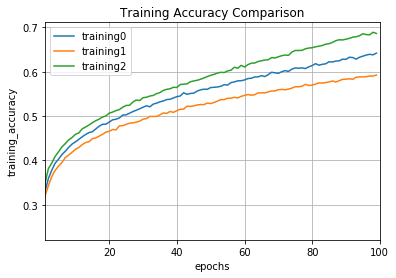

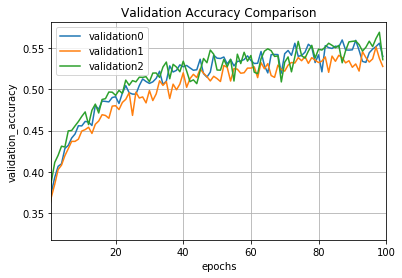

In [28]:
model1 = MLP_shape(256, 128)
model2 = MLP_shape(1024, 512)

history1 = model1.fit(X_train, Y_train,
                    batch_size=batch_size,
                    epochs=nb_epoch,
                    verbose=1,
                    validation_data=(X_test, Y_test))
saveHistory(history1,'history1')

history2 = model2.fit(X_train, Y_train,
                    batch_size=batch_size,
                    epochs=nb_epoch,
                    verbose=1,
                    validation_data=(X_test, Y_test))
saveHistory(history2,'history2')

plot_train_acc(1, [historyDef, history1, history2])
plot_val_acc(2, [historyDef, history1, history2])


## 2) Different drop-out rates:

### Define base model function:

In [29]:
def MLP_drop_rate(drop_rate):
    model = Sequential()
    model.add(Dense(512, input_shape=X_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(Dropout(drop_rate))
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(drop_rate))
    model.add(Dense(10))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])
    #model.summary()
    return(model)

### Generate 2 different models with different drop rate and plot the graphs:

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 17s 343us/step - loss: 2.0025 - acc: 0.2789 - val_loss: 1.8506 - val_acc: 0.3538
Epoch 2/100
50000/50000 [==============================] - 16s 326us/step - loss: 1.8327 - acc: 0.3489 - val_loss: 1.7703 - val_acc: 0.3831
Epoch 3/100
50000/50000 [==============================] - 16s 321us/step - loss: 1.7644 - acc: 0.3753 - val_loss: 1.7220 - val_acc: 0.3935
Epoch 4/100
50000/50000 [==============================] - 16s 317us/step - loss: 1.7193 - acc: 0.3933 - val_loss: 1.6804 - val_acc: 0.4111
Epoch 5/100
50000/50000 [==============================] - 16s 321us/step - loss: 1.6792 - acc: 0.4083 - val_loss: 1.6436 - val_acc: 0.4270
Epoch 6/100
50000/50000 [==============================] - 16s 323us/step - loss: 1.6488 - acc: 0.4182 - val_loss: 1.6021 - val_acc: 0.4377
Epoch 7/100
50000/50000 [==============================] - 16s 320us/step - loss: 1.6211 - acc: 0.4298 - val_l

Epoch 16/100
50000/50000 [==============================] - 16s 324us/step - loss: 1.6823 - acc: 0.4015 - val_loss: 1.5703 - val_acc: 0.4500
Epoch 17/100
50000/50000 [==============================] - 16s 323us/step - loss: 1.6705 - acc: 0.4049 - val_loss: 1.5648 - val_acc: 0.4584
Epoch 18/100
50000/50000 [==============================] - 16s 324us/step - loss: 1.6646 - acc: 0.4101 - val_loss: 1.5676 - val_acc: 0.4568
Epoch 19/100
50000/50000 [==============================] - 16s 327us/step - loss: 1.6483 - acc: 0.4142 - val_loss: 1.5506 - val_acc: 0.4589
Epoch 20/100
50000/50000 [==============================] - 16s 324us/step - loss: 1.6423 - acc: 0.4160 - val_loss: 1.5304 - val_acc: 0.4666
Epoch 21/100
50000/50000 [==============================] - 16s 325us/step - loss: 1.6330 - acc: 0.4226 - val_loss: 1.5323 - val_acc: 0.4610
Epoch 22/100
50000/50000 [==============================] - 16s 325us/step - loss: 1.6280 - acc: 0.4245 - val_loss: 1.5360 - val_acc: 0.4631
Epoch 23/100


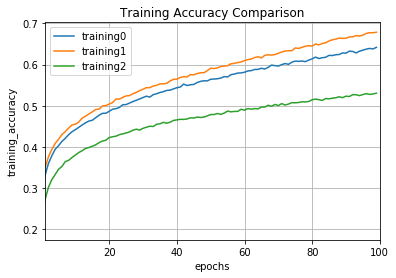

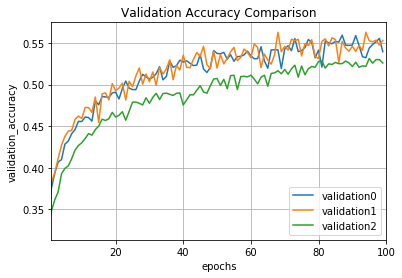

In [30]:
model3 = MLP_drop_rate(0.1)
model4 = MLP_drop_rate(0.5)

history3 = model3.fit(X_train, Y_train,
                    batch_size=batch_size,
                    epochs=nb_epoch,
                    verbose=1,
                    validation_data=(X_test, Y_test))
saveHistory(history3,'history3')
history4 = model4.fit(X_train, Y_train,
                    batch_size=batch_size,
                    epochs=nb_epoch,
                    verbose=1,
                    validation_data=(X_test, Y_test))
saveHistory(history4,'history4')

plot_train_acc(3, [historyDef, history3, history4])
plot_val_acc(4, [historyDef, history3, history4])

## 3) Different number of layers:

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 38s 759us/step - loss: 2.0761 - acc: 0.2381 - val_loss: 1.8771 - val_acc: 0.3365
Epoch 2/100
50000/50000 [==============================] - 37s 744us/step - loss: 1.8918 - acc: 0.3170 - val_loss: 1.7825 - val_acc: 0.3708
Epoch 3/100
50000/50000 [==============================] - 37s 743us/step - loss: 1.8133 - acc: 0.3520 - val_loss: 1.7194 - val_acc: 0.3910
Epoch 4/100
50000/50000 [==============================] - 37s 746us/step - loss: 1.7614 - acc: 0.3726 - val_loss: 1.6983 - val_acc: 0.3967
Epoch 5/100
50000/50000 [==============================] - 37s 750us/step - loss: 1.7175 - acc: 0.3886 - val_loss: 1.6495 - val_acc: 0.4150
Epoch 6/100
50000/50000 [==============================] - 37s 745us/step - loss: 1.6818 - acc: 0.4032 - val_loss: 1.6072 - val_acc: 0.4340
Epoch 7/100
50000/50000 [==============================] - 38s 750us/step - loss: 1.6547 - acc: 0.4100 - val_l

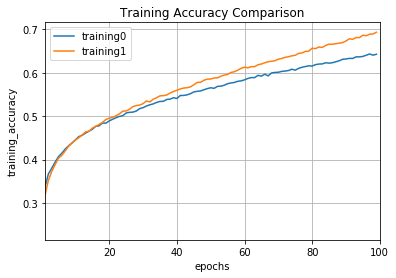

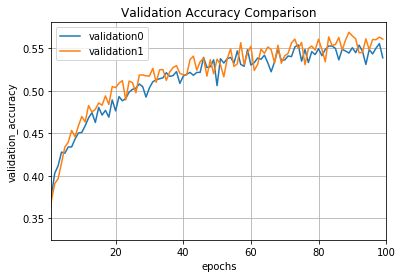

In [8]:
# model 5 has 3 hiden layers
model5 = Sequential()
model5.add(Dense(1024, input_shape=X_train.shape[1:]))
model5.add(Activation('relu'))
model5.add(Dropout(0.2))
model5.add(Dense(512))
model5.add(Activation('relu'))
model5.add(Dropout(0.2))
model5.add(Dense(256))
model5.add(Activation('relu'))
model5.add(Dropout(0.2))
model5.add(Dense(10))
model5.add(Activation('softmax'))

model5.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history5 = model5.fit(X_train, Y_train,
                    batch_size=batch_size,
                    epochs=nb_epoch,
                    verbose=1,
                    validation_data=(X_test, Y_test))
saveHistory(history5,'history5')
           
plot_train_acc(5, [historyDef, history5])
plot_val_acc(6, [historyDef, history5])

## 4) Different learning rates

### Define base model function:

In [9]:
def MLP_learningRate(lr, decay):
    model = Sequential()
    model.add(Dense(512, input_shape=X_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = SGD(lr=lr, momentum=0.0, decay=decay, nesterov=False)
    model.compile(loss='categorical_crossentropy',
                  optimizer=sgd,
                  metrics=['accuracy'])
    #model.summary()
    return(model)

### Generate 2 different models with different learning rate and plot the graphs:

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 18s 366us/step - loss: 1.9684 - acc: 0.2873 - val_loss: 1.8512 - val_acc: 0.3334
Epoch 2/100
50000/50000 [==============================] - 18s 357us/step - loss: 1.7968 - acc: 0.3596 - val_loss: 1.7150 - val_acc: 0.3932
Epoch 3/100
50000/50000 [==============================] - 17s 348us/step - loss: 1.7236 - acc: 0.3889 - val_loss: 1.7284 - val_acc: 0.3940
Epoch 4/100
50000/50000 [==============================] - 17s 334us/step - loss: 1.6743 - acc: 0.4048 - val_loss: 1.6160 - val_acc: 0.4246
Epoch 5/100
50000/50000 [==============================] - 17s 334us/step - loss: 1.6334 - acc: 0.4212 - val_loss: 1.5511 - val_acc: 0.4524
Epoch 6/100
50000/50000 [==============================] - 17s 334us/step - loss: 1.6047 - acc: 0.4323 - val_loss: 1.5613 - val_acc: 0.4471
Epoch 7/100
50000/50000 [==============================] - 17s 335us/step - loss: 1.5804 - acc: 0.4416 - val_l

Epoch 59/100
50000/50000 [==============================] - 17s 332us/step - loss: 1.0434 - acc: 0.6263 - val_loss: 1.2839 - val_acc: 0.5476
Epoch 60/100
50000/50000 [==============================] - 17s 331us/step - loss: 1.0363 - acc: 0.6312 - val_loss: 1.3319 - val_acc: 0.5290
Epoch 61/100
50000/50000 [==============================] - 17s 331us/step - loss: 1.0328 - acc: 0.6336 - val_loss: 1.2982 - val_acc: 0.5435
Epoch 62/100
50000/50000 [==============================] - 16s 329us/step - loss: 1.0243 - acc: 0.6361 - val_loss: 1.2683 - val_acc: 0.5479
Epoch 63/100
50000/50000 [==============================] - 17s 330us/step - loss: 1.0224 - acc: 0.6357 - val_loss: 1.2667 - val_acc: 0.5505
Epoch 64/100
50000/50000 [==============================] - 17s 332us/step - loss: 1.0130 - acc: 0.6378 - val_loss: 1.2689 - val_acc: 0.5467
Epoch 65/100
50000/50000 [==============================] - 17s 330us/step - loss: 1.0090 - acc: 0.6400 - val_loss: 1.2961 - val_acc: 0.5483
Epoch 66/100


Epoch 17/100
50000/50000 [==============================] - 17s 332us/step - loss: 1.5217 - acc: 0.4638 - val_loss: 1.4929 - val_acc: 0.4734
Epoch 18/100
50000/50000 [==============================] - 17s 338us/step - loss: 1.5137 - acc: 0.4660 - val_loss: 1.4839 - val_acc: 0.4767
Epoch 19/100
50000/50000 [==============================] - 17s 332us/step - loss: 1.5050 - acc: 0.4675 - val_loss: 1.4829 - val_acc: 0.4752
Epoch 20/100
50000/50000 [==============================] - 17s 331us/step - loss: 1.4959 - acc: 0.4721 - val_loss: 1.4620 - val_acc: 0.4844
Epoch 21/100
50000/50000 [==============================] - 17s 331us/step - loss: 1.4884 - acc: 0.4753 - val_loss: 1.4618 - val_acc: 0.4812
Epoch 22/100
50000/50000 [==============================] - 17s 331us/step - loss: 1.4769 - acc: 0.4791 - val_loss: 1.4501 - val_acc: 0.4877
Epoch 23/100
50000/50000 [==============================] - 17s 340us/step - loss: 1.4734 - acc: 0.4799 - val_loss: 1.4469 - val_acc: 0.4895
Epoch 24/100


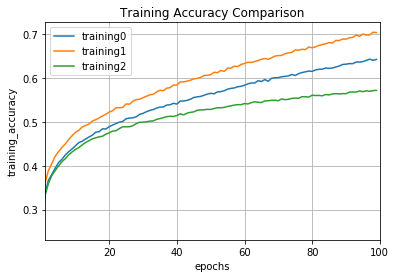

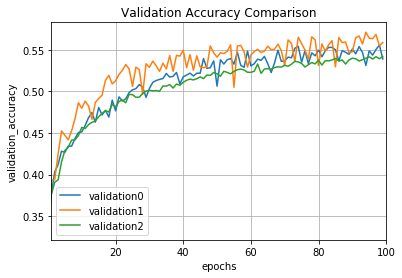

In [10]:
model6 = MLP_learningRate(0.03, 0.0)
model7 = MLP_learningRate(0.01, 0.01/nb_epoch)

history6 = model6.fit(X_train, Y_train,
                    batch_size=batch_size,
                    epochs=nb_epoch,
                    verbose=1,
                    validation_data=(X_test, Y_test))
saveHistory(history6,'history6')
history7 = model7.fit(X_train, Y_train,
                    batch_size=batch_size,
                    epochs=nb_epoch,
                    verbose=1,
                    validation_data=(X_test, Y_test))
saveHistory(history7,'history7')

plot_train_acc(7, [historyDef, history6, history7])
plot_val_acc(8, [historyDef, history6, history7])

## 5) Different activation functions:

### Define base model function:

In [11]:
def MLP_act_func(act_func):
    model = Sequential()
    model.add(Dense(512, input_shape=X_train.shape[1:]))
    model.add(Activation(act_func))
    model.add(Dropout(0.2))
    model.add(Dense(256))
    model.add(Activation(act_func))
    model.add(Dropout(0.2))
    model.add(Dense(10))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])
    #model.summary()
    return(model)

### Generate 2 different models with different activation functions and plot the graphs:

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 17s 340us/step - loss: 2.3466 - acc: 0.1095 - val_loss: 2.2666 - val_acc: 0.1871
Epoch 2/100
50000/50000 [==============================] - 15s 307us/step - loss: 2.2976 - acc: 0.1288 - val_loss: 2.2330 - val_acc: 0.2348
Epoch 3/100
50000/50000 [==============================] - 15s 307us/step - loss: 2.2575 - acc: 0.1511 - val_loss: 2.1965 - val_acc: 0.2481
Epoch 4/100
50000/50000 [==============================] - 15s 306us/step - loss: 2.2191 - acc: 0.1718 - val_loss: 2.1563 - val_acc: 0.2598
Epoch 5/100
50000/50000 [==============================] - 15s 309us/step - loss: 2.1785 - acc: 0.1896 - val_loss: 2.1191 - val_acc: 0.2804
Epoch 6/100
50000/50000 [==============================] - 15s 307us/step - loss: 2.1474 - acc: 0.2009 - val_loss: 2.0857 - val_acc: 0.2924
Epoch 7/100
50000/50000 [==============================] - 15s 308us/step - loss: 2.1150 - acc: 0.2126 - val_l

Epoch 16/100
50000/50000 [==============================] - 16s 317us/step - loss: 1.8164 - acc: 0.3513 - val_loss: 1.7530 - val_acc: 0.3872
Epoch 17/100
50000/50000 [==============================] - 16s 315us/step - loss: 1.8088 - acc: 0.3515 - val_loss: 1.7472 - val_acc: 0.3871
Epoch 18/100
50000/50000 [==============================] - 16s 316us/step - loss: 1.8009 - acc: 0.3545 - val_loss: 1.7366 - val_acc: 0.3910
Epoch 19/100
50000/50000 [==============================] - 16s 317us/step - loss: 1.7918 - acc: 0.3617 - val_loss: 1.7259 - val_acc: 0.4004
Epoch 20/100
50000/50000 [==============================] - 16s 316us/step - loss: 1.7846 - acc: 0.3623 - val_loss: 1.7195 - val_acc: 0.4005
Epoch 21/100
50000/50000 [==============================] - 16s 315us/step - loss: 1.7790 - acc: 0.3635 - val_loss: 1.7122 - val_acc: 0.4024
Epoch 22/100
50000/50000 [==============================] - 16s 315us/step - loss: 1.7733 - acc: 0.3688 - val_loss: 1.7074 - val_acc: 0.4072
Epoch 23/100


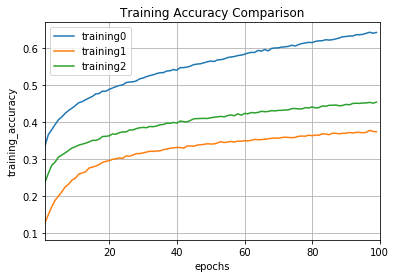

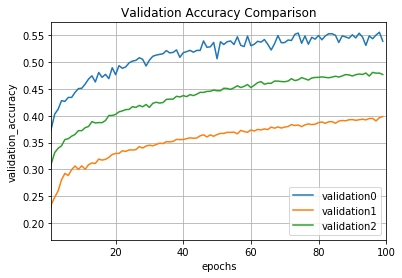

In [12]:
model8 = MLP_act_func('sigmoid')
model9 = MLP_act_func('softplus')

history8 = model8.fit(X_train, Y_train,
                    batch_size=batch_size,
                    epochs=nb_epoch,
                    verbose=1,
                    validation_data=(X_test, Y_test))
saveHistory(history8,'history8')
history9 = model9.fit(X_train, Y_train,
                    batch_size=batch_size,
                    epochs=nb_epoch,
                    verbose=1,
                    validation_data=(X_test, Y_test))
saveHistory(history9,'history9')

plot_train_acc(9, [historyDef, history8, history9])
plot_val_acc(10, [historyDef, history8, history9])

# Designing an MLP model

In [11]:
# my model consists of 3 layers (1024, 512 and 256)
myModel = Sequential()
myModel.add(Dense(1024, input_shape=X_train.shape[1:]))
myModel.add(Activation('relu'))
myModel.add(Dropout(0.2))
myModel.add(Dense(512))
myModel.add(Activation('relu'))
myModel.add(Dropout(0.2))
myModel.add(Dense(256))
myModel.add(Activation('relu'))
myModel.add(Dropout(0.2))
myModel.add(Dense(10))
myModel.add(Activation('softmax'))

#learning rate of 0.05
sgd = SGD(lr=0.05)
myModel.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

myHistory = myModel.fit(X_train, Y_train,
                    batch_size=batch_size,
                    epochs=nb_epoch,
                    verbose=1,
                    validation_data=(X_test, Y_test))
saveHistory(myHistory,'myHistory')


Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 65s 1ms/step - loss: 1.9827 - acc: 0.2795 - val_loss: 1.8249 - val_acc: 0.3350
Epoch 2/100
50000/50000 [==============================] - 45s 897us/step - loss: 1.7979 - acc: 0.3537 - val_loss: 1.7488 - val_acc: 0.3794
Epoch 3/100
50000/50000 [==============================] - 41s 818us/step - loss: 1.7176 - acc: 0.3869 - val_loss: 1.6393 - val_acc: 0.4165
Epoch 4/100
50000/50000 [==============================] - 42s 847us/step - loss: 1.6687 - acc: 0.4024 - val_loss: 1.6585 - val_acc: 0.4080
Epoch 5/100
50000/50000 [==============================] - 42s 830us/step - loss: 1.6232 - acc: 0.4231 - val_loss: 1.5960 - val_acc: 0.4311
Epoch 6/100
50000/50000 [==============================] - 42s 847us/step - loss: 1.5885 - acc: 0.4331 - val_loss: 1.5137 - val_acc: 0.4610
Epoch 7/100
50000/50000 [==============================] - 42s 836us/step - loss: 1.5576 - acc: 0.4473 - val_los

50000/50000 [==============================] - 39s 788us/step - loss: 0.9041 - acc: 0.6748 - val_loss: 1.3081 - val_acc: 0.5478
Epoch 59/100
50000/50000 [==============================] - 40s 799us/step - loss: 0.8953 - acc: 0.6765 - val_loss: 1.3356 - val_acc: 0.5524
Epoch 60/100
50000/50000 [==============================] - 39s 776us/step - loss: 0.8864 - acc: 0.6823 - val_loss: 1.2880 - val_acc: 0.5545
Epoch 61/100
50000/50000 [==============================] - 39s 785us/step - loss: 0.8778 - acc: 0.6852 - val_loss: 1.2924 - val_acc: 0.5604
Epoch 62/100
50000/50000 [==============================] - 39s 777us/step - loss: 0.8691 - acc: 0.6874 - val_loss: 1.2848 - val_acc: 0.5552
Epoch 63/100
50000/50000 [==============================] - 39s 774us/step - loss: 0.8616 - acc: 0.6908 - val_loss: 1.2953 - val_acc: 0.5596
Epoch 64/100
50000/50000 [==============================] - 39s 783us/step - loss: 0.8481 - acc: 0.6939 - val_loss: 1.3212 - val_acc: 0.5580
Epoch 65/100
50000/50000 [

### Plot the graph to compare between the two models

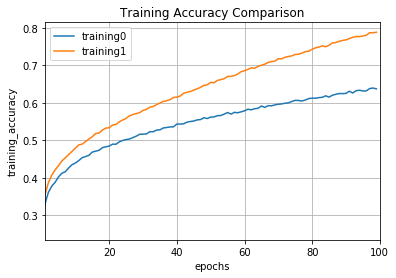

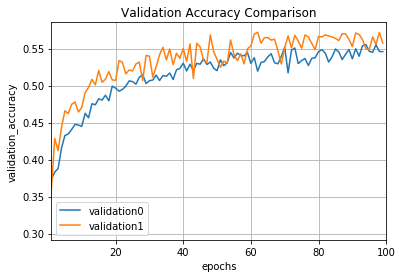

In [10]:
plot_train_acc(11, [historyDef, myHistory])
plot_val_acc(12, [historyDef, myHistory])